In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Embedding, LSTM, GRU
import gensim
import spacy 
import nltk 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D

# Reading Data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/") 

Mounted at /content/gdrive/


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Aim-Tech/cleaned.csv")

In [ ]:
data.head()

,id,text,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه ووحشيه وتطلب...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [ ]:
Y = data.dialect
X = data.text

In [ ]:
from sklearn.utils import class_weight 
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(data.dialect),
                                                 y = data.dialect)
class_weights = {i : class_weights[i] for i in range(18)}

In [ ]:
from sklearn import preprocessing
Encoder = preprocessing.LabelEncoder()
Y = Encoder.fit_transform(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, random_state=42, test_size=0.1, shuffle=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(binary=True)
tfidf_train = vec.fit_transform(X_train).astype('float16')
tfidf_test = vec.transform(X_test).astype('float16')

In [ ]:
model = Sequential() 
model.add(Dense(64,input_shape=(len(vec.get_feature_names()),),activation='tanh'))
model.add(Dropout(.3)) 
model.add(Dense(32,activation='tanh'))
model.add(Dropout(.3))
model.add(Dense(16,activation='tanh'))
model.add(Dropout(.3))

model.add(Dense(18,activation='softmax'))
opt= tf.keras.optimizers.Adam(learning_rate=.0005)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(tfidf_train,y_train,batch_size=512,epochs=15,verbose=1, validation_data=(tfidf_test, y_test),class_weight=class_weights)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_16/dense_48/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_16/dense_48/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_16/dense_48/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


806/806 [==============================] - 16s 15ms/step - loss: 2.4680 - accuracy: 0.2459 - val_loss: 2.0279 - val_accuracy: 0.3907
Epoch 2/15
806/806 [==============================] - 10s 11ms/step - loss: 2.0550 - accuracy: 0.3591 - val_loss: 1.8970 - val_accuracy: 0.4157
Epoch 3/15
806/806 [==============================] - 10s 11ms/step - loss: 1.9123 - accuracy: 0.3947 - val_loss: 1.8480 - val_accuracy: 0.4274
Epoch 4/15
806/806 [==============================] - 10s 11ms/step - loss: 1.8203 - accuracy: 0.4187 - val_loss: 1.8318 - val_accuracy: 0.4303
Epoch 5/15
806/806 [==============================] - 10s 11ms/step - loss: 1.7438 - accuracy: 0.4364 - val_loss: 1.8322 - val_accuracy: 0.4323
Epoch 6/15
806/806 [==============================] - 10s 11ms/step - loss: 1.6820 - accuracy: 0.4520 - val_loss: 1.8306 - val_accuracy: 0.4355
Epoch 7/15
806/806 [==============================] - 10s 11ms/step - loss: 1.6258 - accuracy: 0.4661 - val_loss: 1.8380 - val_accuracy: 0.4366
Epo

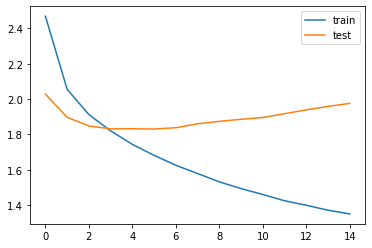

In [ ]:
import matplotlib.pyplot as plt  
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
preds = model.predict(tfidf_test)
class_labels = np.argmax(preds, axis=1) 

              precision    recall  f1-score   support

           0       0.35      0.36      0.36      2556
           1       0.22      0.24      0.23      2494
           2       0.49      0.41      0.44      1933
           3       0.68      0.77      0.72      5106
           4       0.51      0.40      0.45      1967
           5       0.31      0.34      0.32      2552
           6       0.36      0.49      0.41      3050
           7       0.54      0.58      0.56      2543
           8       0.54      0.62      0.58      3162
           9       0.56      0.52      0.54      1239
          10       0.30      0.24      0.27      2420
          11       0.36      0.47      0.40      3343
          12       0.37      0.45      0.40      2542
          13       0.37      0.28      0.32      3561
          14       0.57      0.46      0.51      1790
          15       0.38      0.29      0.32      2141
          16       0.46      0.33      0.38      1296
          17       0.26    

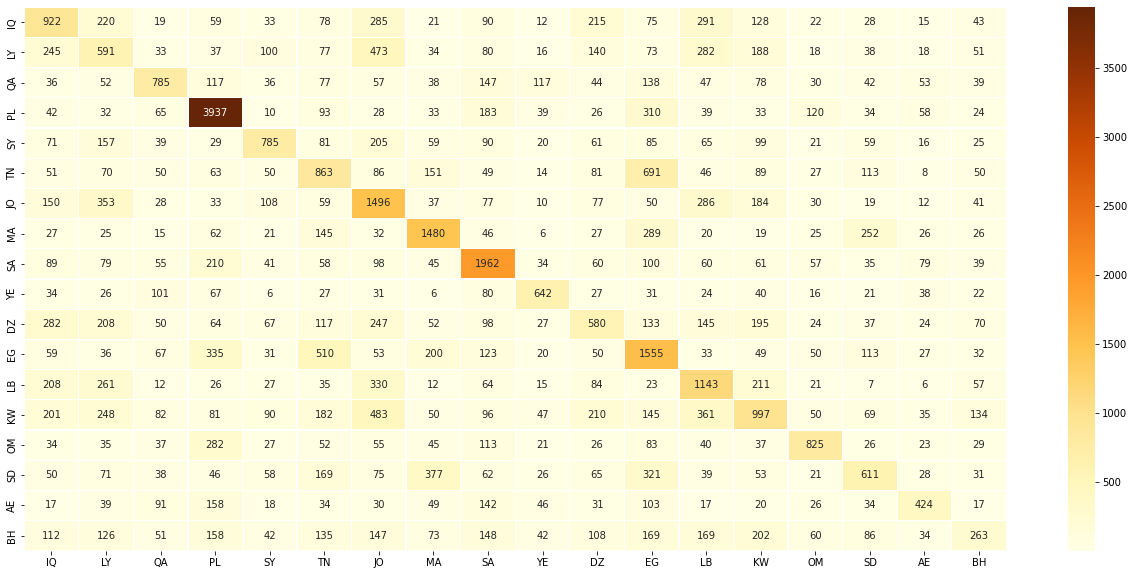

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,classification_report
labels = data.dialect.unique()
print(classification_report(class_labels,y_test))

plt.figure(figsize=(22,10))
conf = confusion_matrix(class_labels,y_test)

ax = seaborn.heatmap(conf,annot=True, linewidths=.3,cmap='YlOrBr',fmt='d')

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show() 

Handling overfitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, random_state=42, test_size=0.1, shuffle=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features_ = 20000
vec = TfidfVectorizer(binary=True,max_features=max_features_)
tfidf_train = vec.fit_transform(X_train).astype('float16')
tfidf_test = vec.transform(X_test).astype('float16')

In [ ]:
model2 = Sequential() 
model2.add(Dense(64,input_shape=(max_features_,),activation='relu'))
model2.add(Dense(32,activation='tanh'))
model2.add(Dropout(.25))
model2.add(Dense(16,activation='tanh'))
model2.add(Dropout(.25))
model2.add(Dense(18,activation='softmax'))
opt= tf.keras.optimizers.Adam(learning_rate=.0004)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model2.fit(tfidf_train,y_train,batch_size=512,epochs=30,
                    verbose=1, validation_data=(tfidf_test, y_test),class_weight=class_weights)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_13/dense_37/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_13/dense_37/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_13/dense_37/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


806/806 [==============================] - 11s 11ms/step - loss: 2.4281 - accuracy: 0.2658 - val_loss: 2.0118 - val_accuracy: 0.3868
Epoch 2/30
806/806 [==============================] - 10s 11ms/step - loss: 2.0070 - accuracy: 0.3746 - val_loss: 1.9061 - val_accuracy: 0.4078
Epoch 3/30
806/806 [==============================] - 10s 11ms/step - loss: 1.8903 - accuracy: 0.4047 - val_loss: 1.8588 - val_accuracy: 0.4195
Epoch 4/30
806/806 [==============================] - 10s 11ms/step - loss: 1.8255 - accuracy: 0.4220 - val_loss: 1.8418 - val_accuracy: 0.4249
Epoch 5/30
806/806 [==============================] - 10s 10ms/step - loss: 1.7755 - accuracy: 0.4362 - val_loss: 1.8297 - val_accuracy: 0.4280
Epoch 6/30
806/806 [==============================] - 10s 10ms/step - loss: 1.7374 - accuracy: 0.4462 - val_loss: 1.8218 - val_accuracy: 0.4303
Epoch 7/30
806/806 [==============================] - 10s 10ms/step - loss: 1.6997 - accuracy: 0.4553 - val_loss: 1.8120 - val_accuracy: 0.4362
Epo

In [ ]:
preds = model2.predict(tfidf_test)
class_labels = np.argmax(preds, axis=1) 

              precision    recall  f1-score   support

           0       0.33      0.29      0.31      2961
           1       0.26      0.24      0.25      2745
           2       0.45      0.42      0.43      1770
           3       0.68      0.76      0.72      5172
           4       0.48      0.36      0.41      2071
           5       0.31      0.32      0.32      2673
           6       0.36      0.43      0.40      3556
           7       0.53      0.55      0.54      2652
           8       0.54      0.62      0.57      3175
           9       0.56      0.49      0.52      1318
          10       0.28      0.21      0.24      2536
          11       0.35      0.48      0.41      3218
          12       0.38      0.40      0.39      2942
          13       0.32      0.32      0.32      2664
          14       0.53      0.47      0.50      1636
          15       0.33      0.27      0.30      1926
          16       0.43      0.31      0.36      1294
          17       0.20    

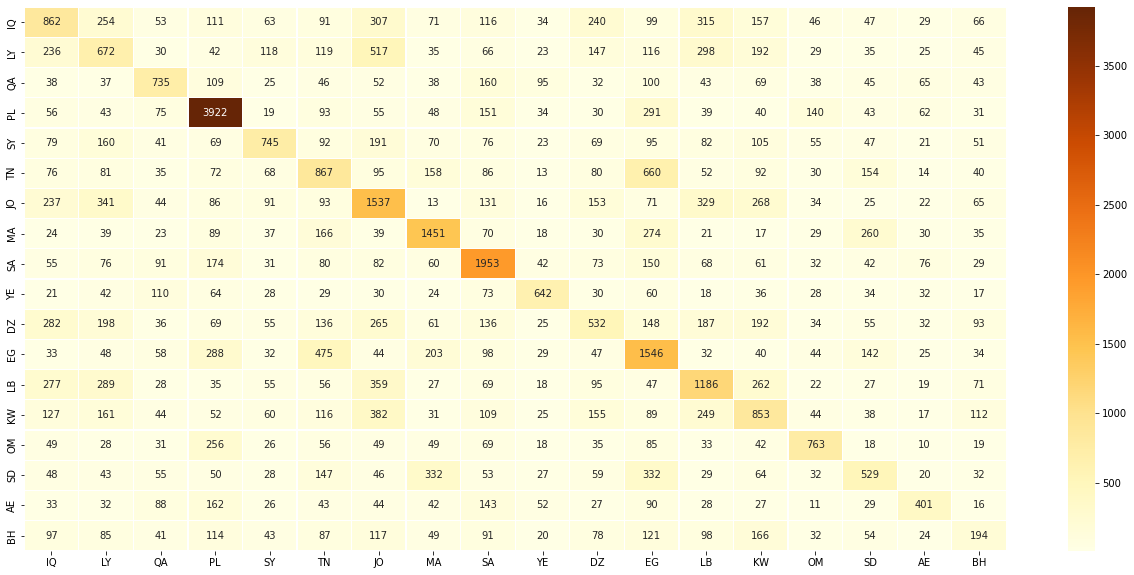

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,classification_report
labels = data.dialect.unique()
print(classification_report(class_labels,y_test))

plt.figure(figsize=(22,10))
conf = confusion_matrix(class_labels,y_test)

ax = seaborn.heatmap(conf,annot=True, linewidths=.3,cmap='YlOrBr',fmt='d')

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show() 